In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize

<font size = 3 color = black face = "Times New Roman">(1)

In [39]:
t, d, error = np.loadtxt("absorption_spectrum.txt", skiprows=4,
                      unpack=True)
print(t)
print(d)
print(error)

[ 0.2  1.4  2.7  3.9  5.1  6.4  7.6  8.8 10.1 11.3 12.5 13.8 15.  16.2
 17.5 18.7 19.9 21.1 22.4 23.6 24.8 26.1 27.3 28.5 29.8 31.  32.2 33.5
 34.7 35.9 37.2 38.4]
[41.1 37.2 28.3 24.8 27.8 34.5 39.  37.7 29.8 22.2 22.3 26.7 30.4 32.6
 28.9 22.9 21.7 22.1 22.3 26.3 26.2 21.4 20.  20.1 21.2 22.  21.6 21.
 19.7 17.9 18.1  8.9]
[0.9 0.9 0.9 1.1 0.8 0.7 0.9 0.8 0.9 0.7 0.6 1.1 0.7 0.8 0.8 1.3 0.9 1.
 1.  1.  0.8 0.9 1.  1.2 0.5 0.9 0.7 0.7 0.9 0.9 0.8 1.1]


In [40]:
def oscDecay(x, A, B, C, tau, omega):
    return A * (1 + B * np.cos(omega * x)) * np.exp(-x**2/(2*tau**2)) + C

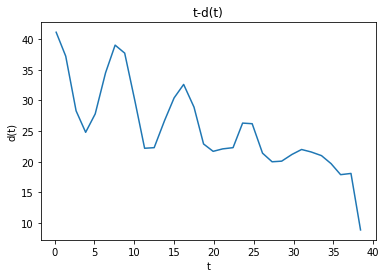

In [41]:
plt.plot(t, d)
plt.xlabel('t')
plt.ylabel('d(t)')
plt.title('t-d(t)')
plt.show()

<font size = 3 color = black face = "Times New Roman">We know that $\omega$ controls the period of the picture, and from the data we find that the interval between valleys are $7.4s$, $8.6s$, $7.4s$ and $8.6s$. We choose to use the average $8s$ as the period, so $\omega$ $=$ ${2\pi} \over {8}$. 

<font size = 3 color = black face = "Times New Roman">We just want to get an initial value, so there is no need to calculate extremely precisely.   
So for $\tau$, I choose to use just three data (3.9, 24.8), (11.3, 22.2) and (19.9, 21.7) to calculate it approximately. They are all in the valley, so we assume:  
$24.8 = $ $ A(1-B)e^{{-3.9^2}\over{2\tau^2}} + C$  
$22.2 = $ $ A(1-B)e^{{-11.3^2}\over{2\tau^2}} + C$  
$21.7 = $ $ A(1-B)e^{{-19.9^2}\over{2\tau^2}} + C$  
Then we can get:  
$2.6 = $ $ A(1-B)(e^{{-3.9^2}\over{2\tau^2}} - e^{{-11.3^2}\over{2\tau^2}})$  
$0.5 = $ $ A(1-B)(e^{{-11.3^2}\over{2\tau^2}} - e^{{-19.9^2}\over{2\tau^2}})$  
Using Taylar expansion we can get an approximate solution:  
$\tau = $ $1\over2$ $\sqrt{{3.9^4 - 11.3^4 - 5.2\times11.3^4 + 5.2\times19.9^4}\over{3.9^2 - 11.3^2 - 5.2\times11.3^2 + 5.2\times19.9^2}}$  
Here I just use the first three term. But don't worry, the results later prove this is viable.

<font size = 3 color = black face = "Times New Roman">Then, we want to get $A$, $B$ and $C$. This is much easier.  
$d_1 = $ $A(1-B)e^{{-t_1^2}\over{2\tau^2}} + C$  
$d_2 = $ $A(1-B)e^{{-t_2^2}\over{2\tau^2}} + C$  
$d_3 = $ $A(1+B)e^{{-t_3^2}\over{2\tau^2}} + C$   
$d_4 = $ $A(1+B)e^{{-t_4^2}\over{2\tau^2}} + C$  
let  
$a_1 = $ ${d_2 - d_1}\over{e^{{-t_2^2}\over{2\tau^2}} - e^{{-t_1^2}\over{2\tau^2}}} $$= A(1-B)$  
$a_2 = $ ${d_4 - d_3}\over{e^{{-t_4^2}\over{2\tau^2}} - e^{{-t_3^2}\over{2\tau^2}}} $$= A(1+B)$  
$A = $${a_1 + a_2}\over{2}$
$B = $${a_2 - a_1}\over{a_1 + a_2}$  
Then we can get C by plugging A and B into a random data.

In [42]:
omega0 = 2*np.pi / 8
tau0 = 1/2*np.sqrt((3.9**4-11.3**4-5.2*11.3**4+5.2*19.9**4)/(3.9**2-11.3**2-5.2*11.3**2+5.2*19.9**2))
a1 = (22.2 - 21.7) / (math.exp(-11.3**2 / (2*tau0**2)) - math.exp(-19.9**2 / (2*tau0**2)))
a2 = (39 - 32.6) / (math.exp(-7.6**2 / (2*tau0**2)) - math.exp(-16.2**2 / (2*tau0**2)))
A0 = (a1 + a2) / 2
B0 = (a2 - a1) / (a1 + a2)
C0 = 24.8 - A0 * (1 - B0) * math.exp(-3.9**2 / (2*tau0**2))
print(f'{chr(969)} = {omega0}')
print(f'{chr(964)} = {tau0}')
print(f'A = {A0}')
print(f'B = {B0}')
print(f'C = {C0}')

ω = 0.7853981633974483
τ = 11.80137890636517
A = 8.2053617324868
B = 0.8441468698999549
C = 23.5891271559341


<font size = 3 color = black face = "Times New Roman">The calculations of $A, B$ and $C$ are based on $\tau$, so the error of $\tau$ may caused larger error of $A, B$ and $C$. 

<font size = 3 color = black face = "Times New Roman">(2)

<font size = 3 color = black face = "Times New Roman">Now we use the inner function scipy.optimize.curve_fit( ) and the initial value we have calculated in $(2)$ to get the best fit.

In [43]:
nlfit, nlpcov = scipy.optimize.curve_fit(oscDecay,
                                         t, d, p0=[A0, B0, C0, tau0, omega0],
                                         sigma=error)
A, B, C, tau, omega = nlfit
d_fit = oscDecay(t, A, B, C, tau, omega)
print(A, B, C, tau, omega)

15.833097542347227 0.5499776893399244 16.938522026263048 17.330476784993124 0.7792678285148086


<font size = 3 color = black face = "Times New Roman">We get the best value $A = 15.833$, $B = 0.555$, $C = 16.94$, $\tau = 17.33$ and $\omega = 0.78$.

In [44]:
def chi_square(t, d, d_fit, error):
    resids = d - d_fit
    chisqr = ((resids / error) ** 2).sum() / float(len(d_fit) - 5)
    return chisqr
chisqr = chi_square(t, d, d_fit, error)
print(chisqr)

4.082547206299438


<font size = 3 color = black face = "Times New Roman">The chi-square of this fitting line is $\chi^2 = 4.08$.

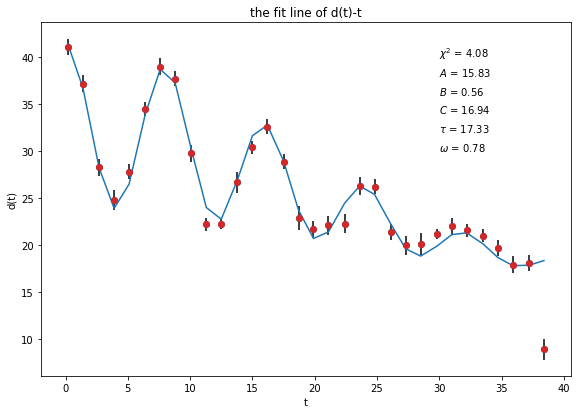

In [53]:
fig = plt.figure(1, figsize=(9.5, 6.5))
plt.plot(t, d_fit)
plt.scatter(t,d)
plt.errorbar(t, d, yerr=error, fmt='oC3', ecolor='black')
plt.xlabel('t')
plt.ylabel('d(t)')
plt.title('the fit line of d(t)-t')
plt.text(30, 40, "$\chi^2$ = 4.08", size = 10, alpha = 1)
plt.text(30, 38, "$A$ = 15.83", size = 10, alpha = 1)
plt.text(30, 36, "$B$ = 0.56", size = 10, alpha = 1)
plt.text(30, 34, "$C$ = 16.94", size = 10, alpha = 1)
plt.text(30, 32, r"$\tau$ = 17.33", size = 10, alpha = 1)
plt.text(30, 30, "$\omega$ = 0.78", size = 10, alpha = 1)
plt.show()

<font size = 3 color = black face = "Times New Roman">(3)

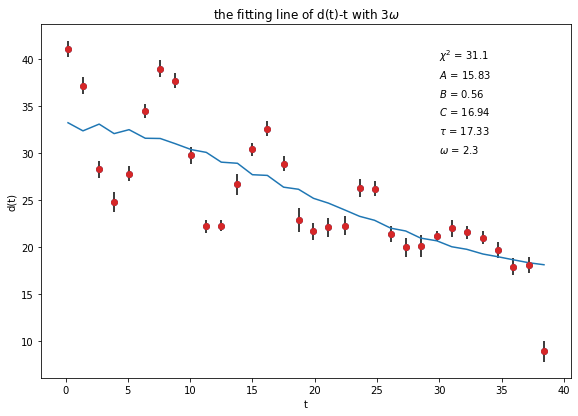

16.416578545556288 0.02625795607715061 16.444035790281642 17.92883166652905 2.314187046799137
31.114160318752024


In [55]:
nlfit2, nlpcov2 = scipy.optimize.curve_fit(oscDecay,
                                         t, d, p0=[A, B, C, tau, omega*3],
                                         sigma=error)
A2, B2, C2, tau2, omega2 = nlfit2
d_fit2 = oscDecay(t, A2, B2, C2, tau2, omega2)
chisqr2 = chi_square(t, d, d_fit2, error)
fig = plt.figure(1, figsize=(9.5, 6.5))
plt.plot(t, d_fit2)
plt.scatter(t,d)
plt.errorbar(t, d, yerr=error, fmt='oC3', ecolor='black')
plt.xlabel('t')
plt.ylabel('d(t)')
plt.title('the fitting line of d(t)-t with 3$\omega$')
plt.text(30, 40, "$\chi^2$ = 31.1", size = 10, alpha = 1)
plt.text(30, 38, "$A$ = 15.83", size = 10, alpha = 1)
plt.text(30, 36, "$B$ = 0.56", size = 10, alpha = 1)
plt.text(30, 34, "$C$ = 16.94", size = 10, alpha = 1)
plt.text(30, 32, r"$\tau$ = 17.33", size = 10, alpha = 1)
plt.text(30, 30, "$\omega$ = 2.3", size = 10, alpha = 1)
plt.show()
print(A2,B2,C2,tau2,omega2)
print(chisqr2)

<font size = 3 color = black face = "Times New Roman">We can see that the picture is quite different with the picture in (2), and the value of $\omega$ changes a lot. It means that this method is very sensitive to the initial value. And the chi-square is much larger than that in (2).

<font size = 3 color = black face = "Times New Roman">(4)

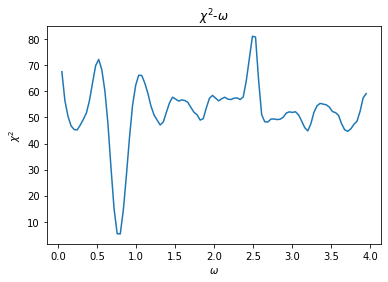

In [34]:
omega_test = np.linspace(0.05,3.95,100)
chisqr_test = np.zeros(len(omega_test))
for i in range(len(omega_test)):
    d_fit_test = oscDecay(t, A, B, C, tau, omega_test[i])
    chisqr_test[i] = chi_square(t, d, d_fit_test, error)
plt.plot(omega_test, chisqr_test)
plt.xlabel('$\omega$')
plt.ylabel('$\chi^2$')
plt.title('$\chi^2$-$\omega$')
plt.show()

<font size = 3 color = black face = "Times New Roman">The best value of $\omega$ is about 0.8, it is corrsponding to our result.